###  Predict the percentage of marks of an student based on the number of study hours


## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

## IMPORTING THE DATA SET

In [12]:
url = "http://bit.ly/w-data"
df =  pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
df.describe()        #max value is  9.2  but here we gonna predict the score for 9.5 hours / day


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


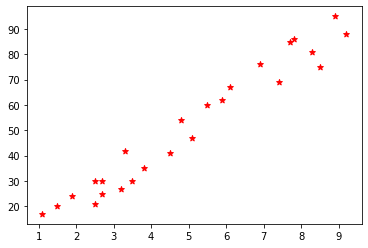

In [14]:

plt.scatter(df["Hours"],df["Scores"],marker ="*",color = 'red')
plt.show()
                                                # here this visualization shows clearly that plot are postive linear regression
                                     

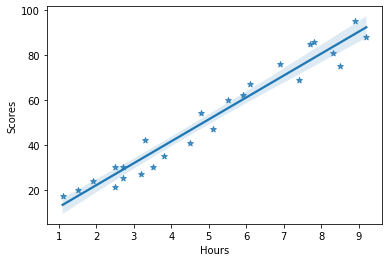

In [15]:
sea.regplot(df["Hours"],df["Scores"],marker ="*")

## SPLITING  DATA INTO HOURS AND SCORES

In [16]:
hours = df.iloc[:,:-1]
scores = df.iloc[:,-1]

## SPLITING DATA INTO TRAINING AND TEST SETS

In [39]:
from sklearn.model_selection import train_test_split 
hours_train, hours_test, scores_train, scores_test = train_test_split(hours,scores,test_size = 0.1,random_state = 0)

## -------------------SIMPLE LINEAR REGRESSION------------------------------------

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(hours_train,scores_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
scores_pred= regressor.predict(hours_test)
scores_pred


array([17.30220982, 34.05529402, 75.44526674])

In [56]:
scores_test

5     20
2     27
19    69
Name: Scores, dtype: int64

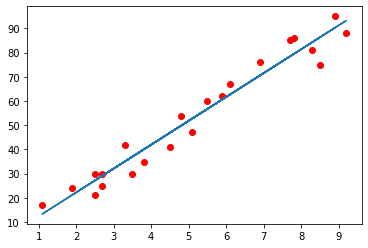

In [22]:
plt.scatter(hours_train,scores_train,color = 'red')
plt.plot(hours_train,regressor.predict(hours_train))

In [61]:
ndf1 = pd.DataFrame({'Actual':scores_test,'predicted':scores_pred})
ndf1

,Actual,predicted
5,20,17.302210
2,27,34.055294
19,69,75.445267


In [62]:
regressor.predict([[9.5]])                  

array([96.1402531])

In [64]:
regressor.score(hours_train,scores_train)              # which shows  the accuracy of the model

0.9529891020405062

In [65]:
regressor.coef_

array([9.85475541])

In [66]:
regressor.intercept_

2.5200767068662344

In [67]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(scores_test, scores_pred)) 

Mean Absolute Error: 5.3994503136120064


In [70]:
from sklearn import metrics  
print('Mean sqaured Error:', 
      metrics.mean_squared_error(scores_test, scores_pred)) 

Mean sqaured Error: 32.865569647342106


In [72]:
from sklearn import metrics  
print('Mean sqaured Error:', 
      metrics.r2_score(scores_test, scores_pred)) 

Mean sqaured Error: 0.9298077534821835


## while the data set visual looks best fit for linear regression so need not to train with any other models



## RESULT                             : STUDENT WILL SCORE (96.14) AS PER PREDICTION
## ACCURACY                       :0.9529 ~ 95%
## MEAN SQAURE ERROR  : 0.9 